# Ordinary Least Squares Regression

In this exercise, we will build OLS Regression models, both univariate and multivariate. We will also evaluate the goodness of fit of our models. We will use the Auto dataset from https://archive.ics.uci.edu/ml/datasets/auto+mpg. It is provided as <b>Auto.csv</b> in the data directory.

First, we will visualize the data to understand how automobile features may be related. Then, we will focus on predicting miles per gallon (mpg) from horsepower (hp). We will build two iterations of the model:

\begin{align*}
    MPG^{\left(i\right)} &= \beta_0^{sv} + \beta_1^{sv} \times hp^{\left(i\right)} + Z^{\left(i\right)} \\
    MPG^{\left(i\right)} &= \beta_0^{mv} + \beta_1^{mv} \times hp^{\left(i\right)} + \beta_2^{mv} \times \left(hp^{\left(i\right)}\right)^2 + Z^{\left(i\right)}
\end{align*}

$Z^{\left(i\right)}$ is noise. We will assess each model by visualizing the predictions, residuals, and quantile-quantile plots. Finally, we will select a model based on held-out data.


In [8]:
#Import the necessary libraries
%matplotlib inline

from matplotlib import pyplot as plt
from patsy import dmatrices
import utils
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import warnings
import sklearn

# some settings
warnings.filterwarnings('ignore')
plt.rc('font', size = 14)

Read the data as a pandas dataframe. For reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [9]:
# Read the data
filename = 'data/Auto.csv'
df = pd.read_csv(filename)

# (0). Visualize the data

**(0a).** [1 pt] Print the number of observations in the dataset. 

In [10]:
print(len(df))

392


**(0b).** [1 pt] Print all the columns in the dataset

In [11]:
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

**(0c).** [1 pt] Produce a Scatter plot of all variables against each other.

Feel free to use the <b>scatter_plot_dataframe()</b> function in utils.py. Note: this function call may take a while.

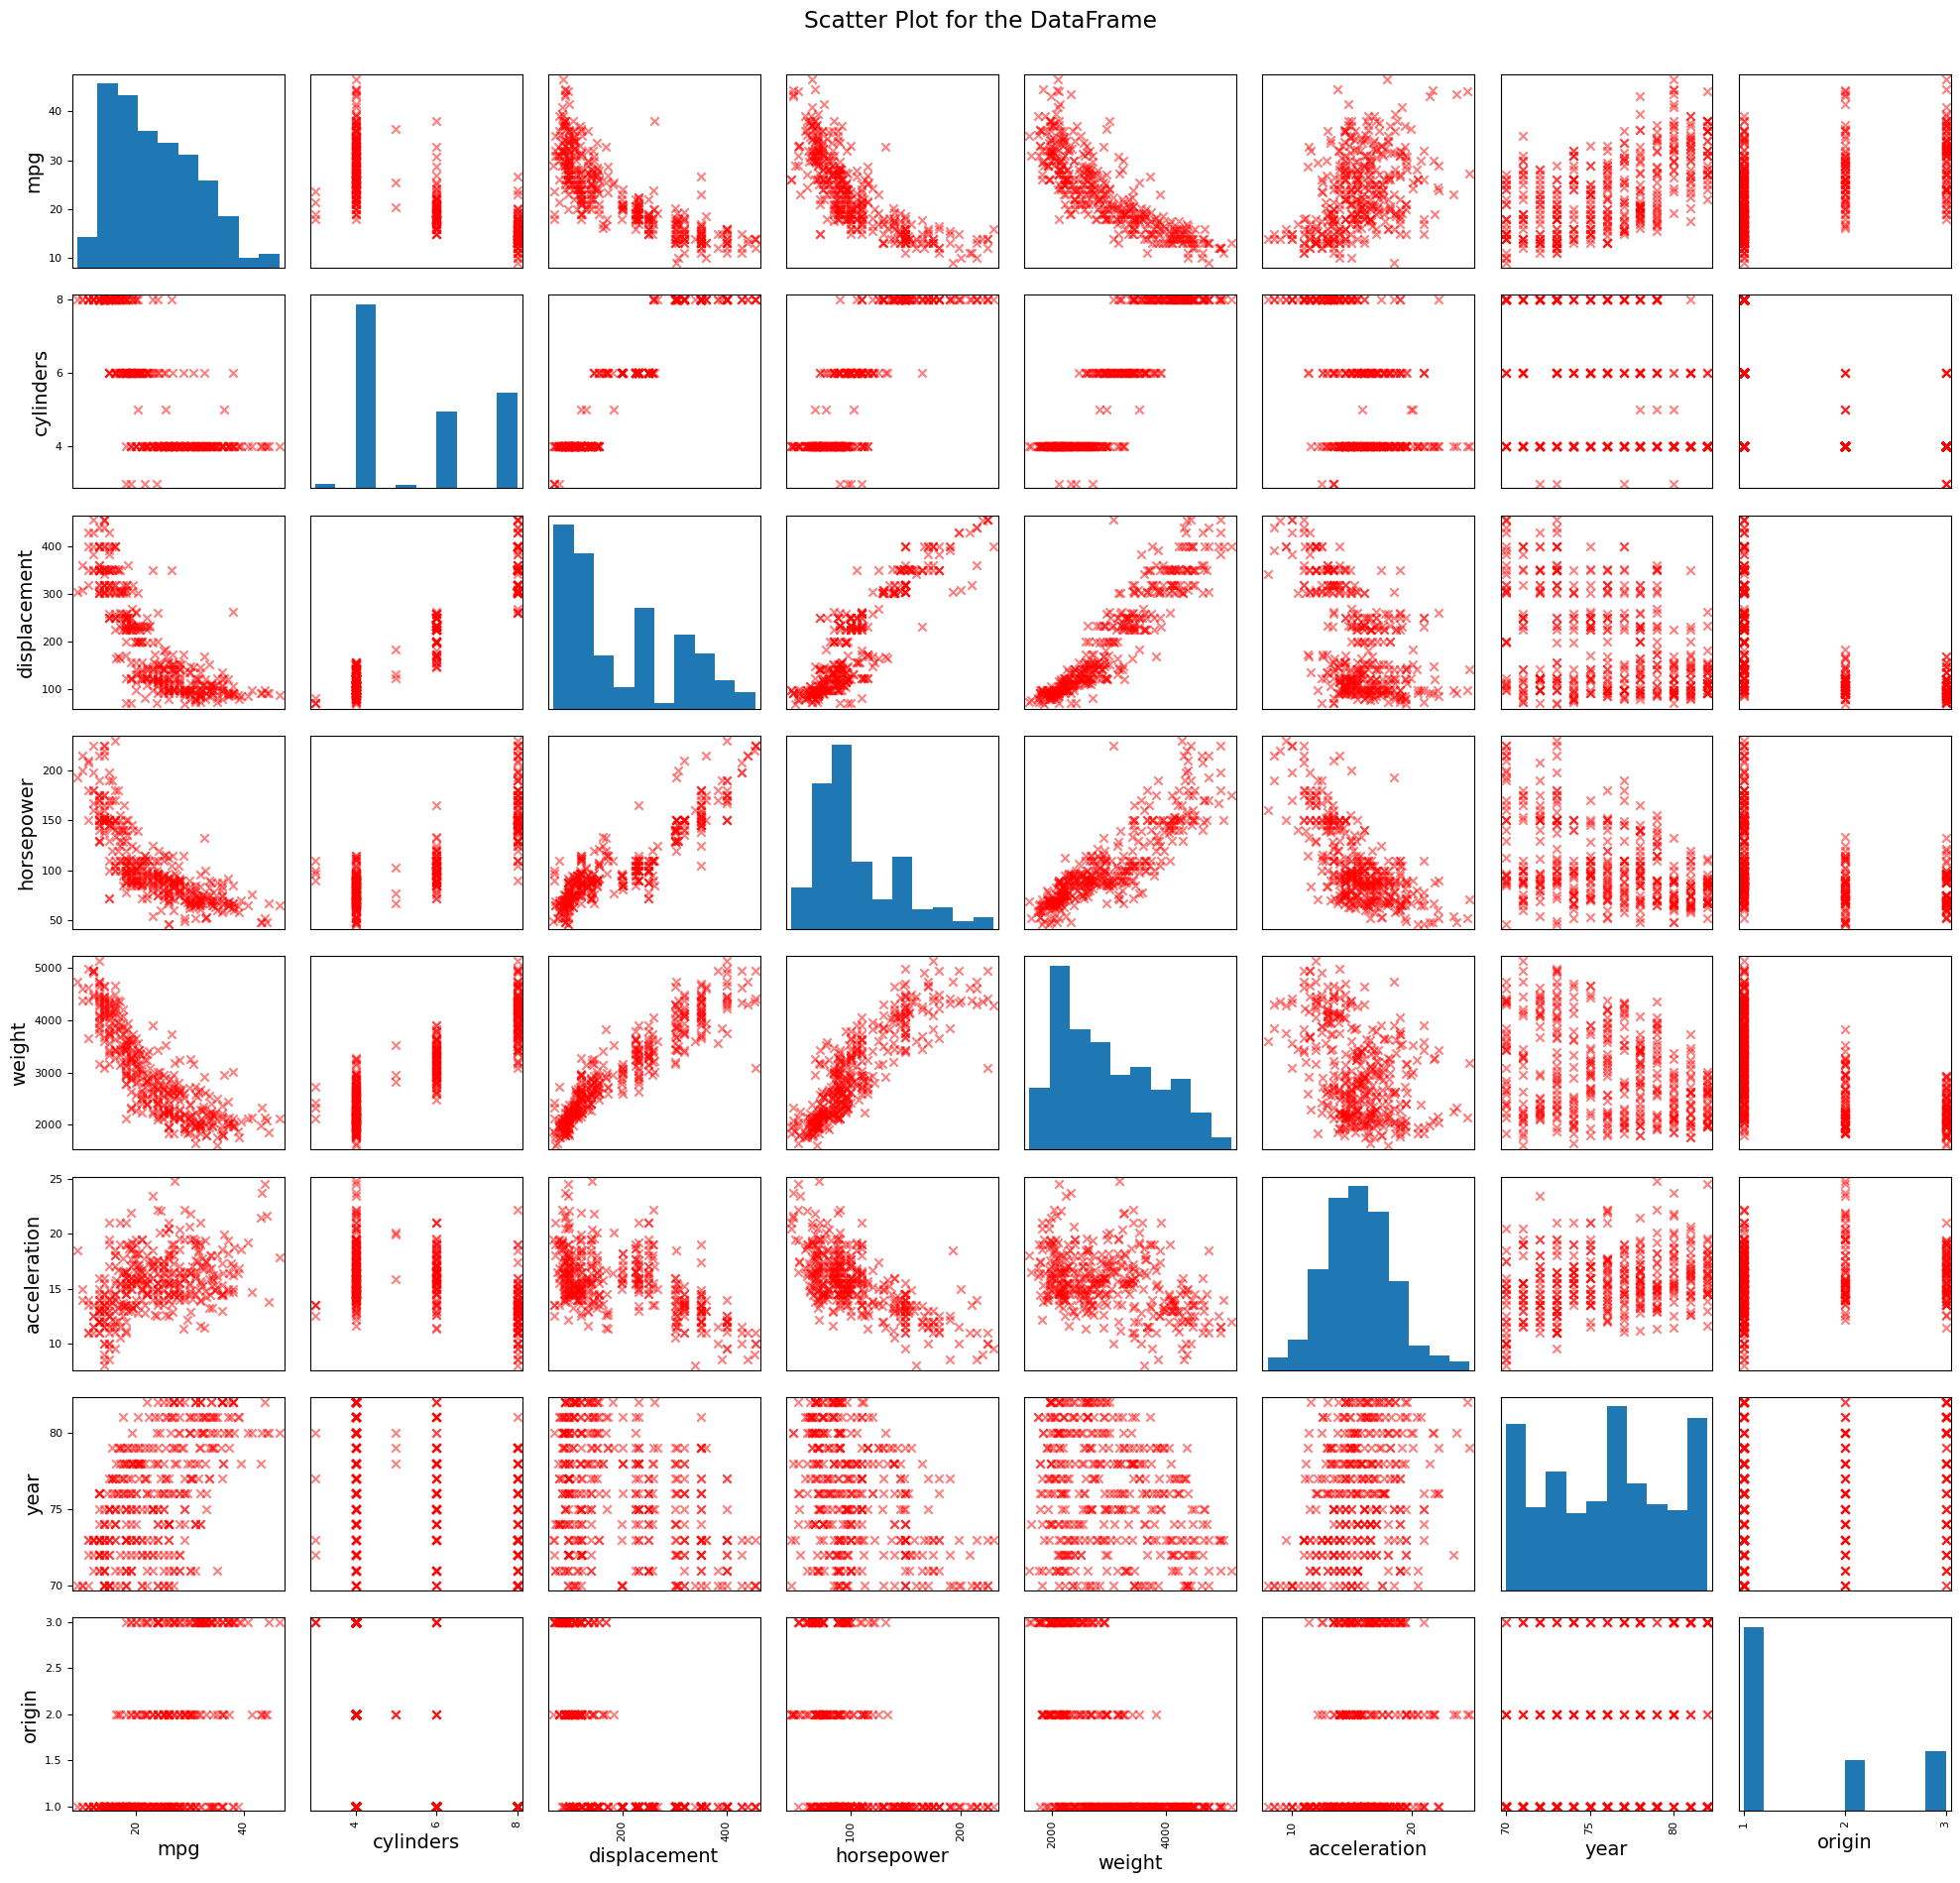

In [12]:
utils.scatter_plot_dataframe(df)

**(0d).** [1 pt] Produce a plot of correlations between all variables.

Feel free to use the <b>correlation_plot()</b> function in utils.py

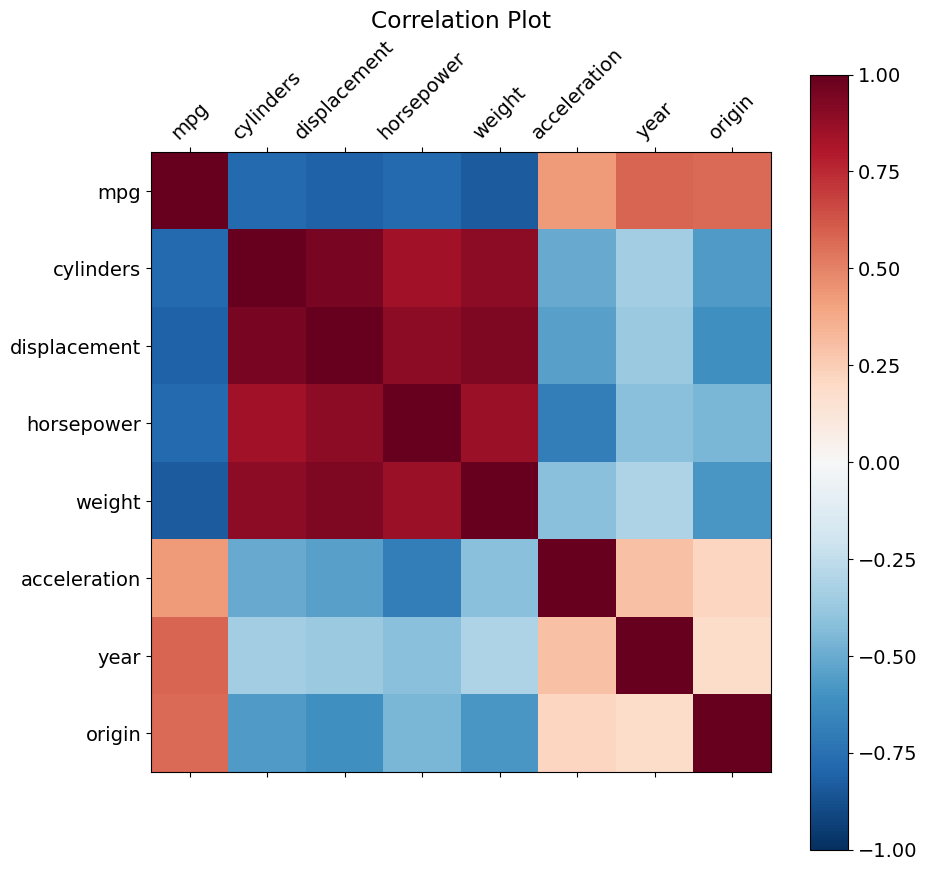

In [13]:
utils.correlation_plot(df)

**(0e).** [1 pt] Using the plots above, can you identify the highly collinear pairs of variables? 

**A:** all pairs between cylinders, displacement, horsepower, weight

**(0f).** [2 pts] Create a function that splits your data into two subsets: a random subset for training and the remaining for testing. Note that the subsets MUST not overlap (i.e. if you use sampling then do so without replacement). You should have roughly 70% of the data in training and the remaining roughly 30% in testing. Call your function and name the outputs **df_train** and **df_test**.

For reproducibility, your function should take in a seed that is used in whichever random generator you choose. Please fill in the function specified below:

In [14]:
def train_test_split(df,
                     seed):
    '''
    Randomly split the pandas dataframe so that 70% of the data are in training and 30% are in testing
    @param df: pandas DataFrame
    @param seed: int, seed for random generator, set for reproducibility
    @return: 1. df_train, pandas DataFrame containing training samples
             2. df_test, pandas DataFrame containing testing samples
    '''
    # generate seed
    np.random.seed(seed)
    #generate mask array to partition training and test sets
    mask = np.random.rand(len(df)) < .7
    df_train = df[mask]
    df_test = df[~mask]
    return df_train, df_test

df_train, df_test = train_test_split(df, 0)
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))


Training data set length=283
Testing data set length=109


# (1). Single Variable OLS Regression

We will start with a single variable regression model. We hypothesize a linear relationship (with intercept) between 'mpg' and 'horsepower':

\begin{equation*}
    MPG^{\left(i\right)} = \beta_0^{sv} + \beta_1^{sv} \times hp^{\left(i\right)} + Z^{\left(i\right)}
\end{equation*}

**(1a).** [2 pts] On <b>df_train</b> ONLY, build an OLS model using <b>statsmodels.OLS</b>. You do not have to fit the model in this step.

The dependent variable is 'mpg', and the independent variable is 'horsepower'. Include an intercept using the add_constant() function in statsmodels. Store your single-variable model in a variable called <b>sv_model</b>

Hint: http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [15]:
expr = 'mpg ~ horsepower'

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

sv_model = sm.regression.linear_model.OLS(y_train, X_train)

**(1b).** [1 pt] Use statsmodels' <b>fit()</b> function to fit the model. Store the output in a variable called <b>sv_results</b>

In [16]:
sv_results = sv_model.fit()

**(1c).** [1 pt] Print a summary of the results by calling <b>summary()</b> on the result from <b>fit()</b>. <br>
You can pass an array of columns as 'xname' to show the column names in the output 

In [17]:
print(sv_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     425.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.74e-58
Time:                        10:25:26   Log-Likelihood:                -858.04
No. Observations:                 283   AIC:                             1720.
Df Residuals:                     281   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9342      0.893     45.818      0.0

**(1d).** [1 pt] What is the R^2 (goodness of fit)?

**A**: .602

**(1e).** [1 pt] Compute predictions for your training samples using the regression. Call the <b>predict()</b> function on <b>sv_results</b>. Store your predictions as <b>sv_y_hat</b>.

In [18]:
sv_y_hat=sv_results.predict(X_train)



**(1f).** [2 pts] On the same plot (using different colors):

1. Produce a scatter plot 'mpg' vs 'horsepower'
2. Produce a plot (or scatterplot) of predictions (i.e. y_hat), 'horsepower'

Label your plots and axes. 

Text(0.5, 1.0, 'actual/predicted mpg vs horsepower')

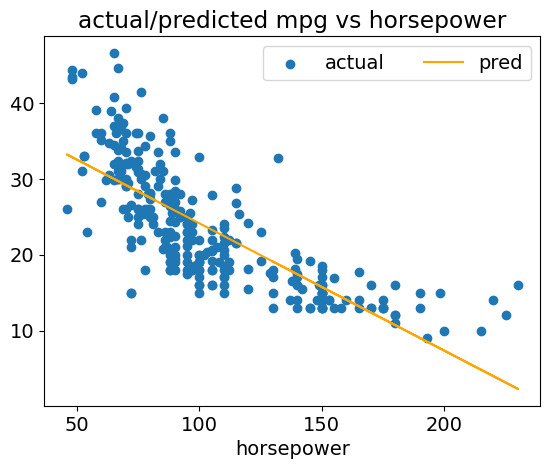

In [19]:
plt.scatter(X_train['horsepower'], y_train)
plt.plot(X_train['horsepower'], sv_y_hat, color='orange')
plt.legend(['actual', 'pred'], ncol=2)
plt.xlabel('horsepower')
plt.title('actual/predicted mpg vs horsepower')

**(1g).** [1 pt] Does the best fit line appear to do justice to the data?

**A:** No

**(1h).** [1 pt] Compute the residuals between observed and predicted mpg for your training samples. Store them as <b>sv_residuals</b>.

In [20]:
sv_residuals =y_train['mpg']-sv_y_hat

**(1i).** [1 pt] Produce a residual plot, that is, a scatter plot of the residuals vs 'horsepower'. Label your plot and axes. A good residual plot has roughly the same variance in residuals across different values of $x$.

Text(0, 0.5, 'residuals')

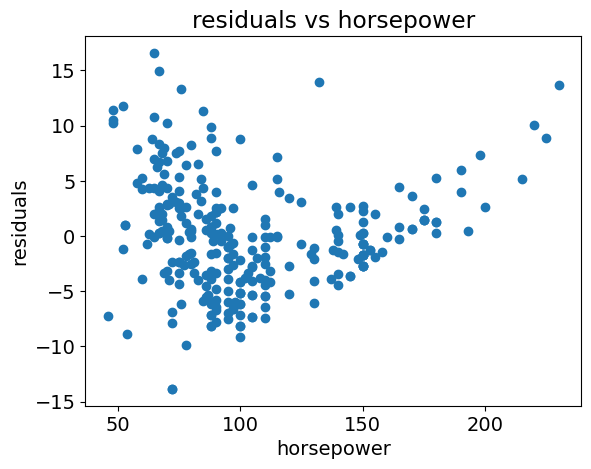

In [21]:
plt.scatter(X_train['horsepower'], sv_residuals)
plt.title('residuals vs horsepower')
plt.xlabel('horsepower')
plt.ylabel('residuals')

**(1j).** [1 pt] Produce a histogram of the <b>sv_residuals</b>.

(array([ 2.,  9., 37., 60., 78., 51., 20., 16.,  6.,  4.]),
 array([-13.84273723, -10.80029291,  -7.75784859,  -4.71540428,
         -1.67295996,   1.36948436,   4.41192867,   7.45437299,
         10.49681731,  13.53926162,  16.58170594]),
 <BarContainer object of 10 artists>)

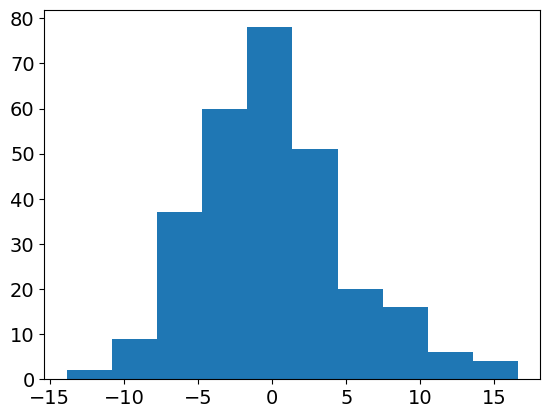

In [22]:
plt.hist(sv_residuals)

**(1k).** [1 pt] Now produce a QQ-plot of the residuals vs the Normal distribution. A QQ-plot compares 2 distributions by plotting their quantiles against each other. You can use the <b>sm.qqplot()</b> function: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

Include a 45-degree reference line. To make your data comparable to this reference line, set the **fit** parameter to standardize your data first.

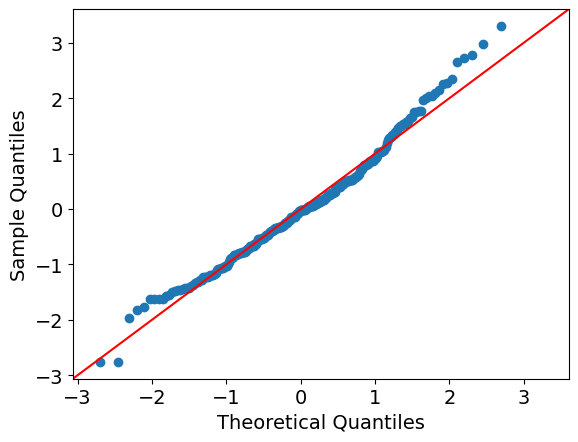

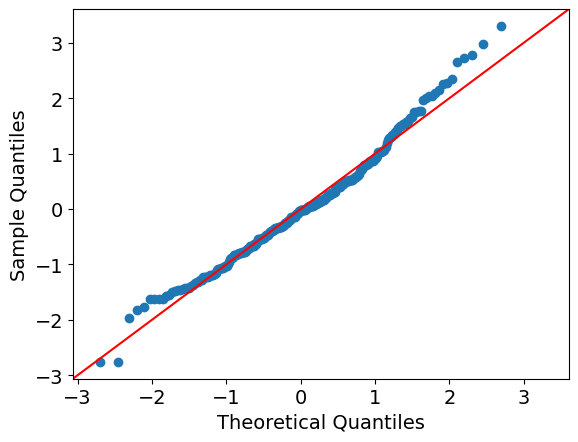

In [23]:
sm.qqplot(sv_residuals, stats.norm, fit=True, line="45")

**(1l).** [1 pt] Do the histogram and QQ-plot suggest that the residuals are Normally distributed?

**A:** Yes

# (2). Two Variable OLS Regression
We will now add one more variable to the single variable regression model. We hypothesize a linear relationship (with intercept) between 'mpg' and the features 'horsepower' and 'horsepower^2'.

\begin{equation*}
    MPG^{\left(i\right)} = \beta_0^{mv} + \beta_1^{mv} \times hp^{\left(i\right)} + \beta_2^{mv} \times \left(hp^{\left(i\right)}\right)^2 + Z^{\left(i\right)}
\end{equation*}

We first introduce a squared-horsepower column.

In [24]:
square_columns = ['horsepower']

**(2a).** [1 pt] Use the <b>introduce_power_terms()</b> function in <b>utils.py</b> to update both **df_train** and **df_test** with the new squared column. Be sure to provide <b>power=2</b> to <b>introduce_power_terms()</b>. Print the columns in either df_train or df_test and observe the new column you've just added.

In [25]:
utils.introduce_power_terms(df_train, 'horsepower',power=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower^2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,22500
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,19600
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,39204
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,7396
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,2704
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,7056
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,6241


**(2b).** [1 pt] Build an OLS model using <b>statsmodels.OLS</b>. You do not have to fit the model in this step.

The dependent variable is 'mpg', and the independent variables are 'horsepower' and 'horsepower^2'. Include the intercept using the add_constant() function in statsmodels. Store your multivariable model in a variable called <b>mv_model</b>.

In [26]:
expr = 'mpg ~ horsepower + horsepower^2'

#create training and test matrices with patsy
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

mv_model = sm.regression.linear_model.OLS(y_train, X_train)

**(2c).** [1 pt] Similar to the exercise above: Fit the model. Then, compute predictions and residuals for the training samples. Save your predictions as <b>mv_y_hat</b> and your residuals as <b>mv_residuals</b>.

In [27]:
mv_results = mv_model.fit()
print(mv_results.summary())
mv_y_hat = mv_results.predict(X_train)
mv_residuals = y_train['mpg']-mv_y_hat

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           9.57e-57
Time:                        10:25:27   Log-Likelihood:                -858.03
No. Observations:                 283   AIC:                             1722.
Df Residuals:                     280   BIC:                             1733.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         40.9405      0.896     45.

**(2d).** [2 pts] On the same plot (using different colors):

1. Produce a scatter plot 'mpg' vs 'horsepower'
2. Produce a plot of predictions (i.e. mv_y_hat) vs 'horsepower'

Label your plots and axes

Text(0.5, 1.0, 'actual/predicted mpg vs horsepower')

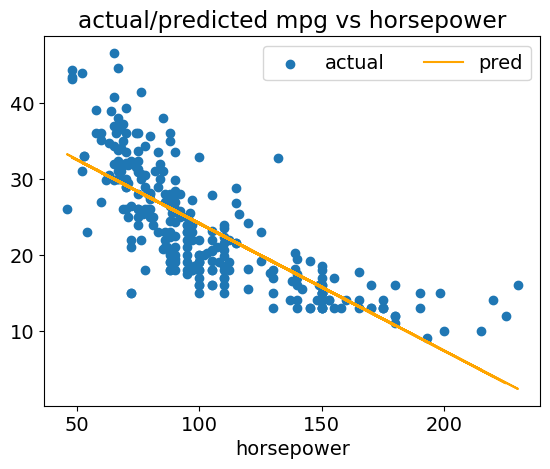

In [28]:
plt.scatter(X_train['horsepower'], y_train)
plt.plot(X_train['horsepower'], mv_y_hat, color='orange')
plt.legend(['actual', 'pred'], ncol=2)
plt.xlabel('horsepower')
plt.title('actual/predicted mpg vs horsepower')

**(2e).** [1 pt] Does the best fit line now appear to do better justice to the data? Why or why not?

**A:** Not really, the squared term is not expressive

**(2f).** [1 pt] Produce a histogram of the <b>mv_residuals</b>.

(array([ 2.,  9., 37., 62., 79., 48., 21., 15.,  6.,  4.]),
 array([-13.79623799, -10.75384438,  -7.71145077,  -4.66905717,
         -1.62666356,   1.41573004,   4.45812365,   7.50051725,
         10.54291086,  13.58530446,  16.62769807]),
 <BarContainer object of 10 artists>)

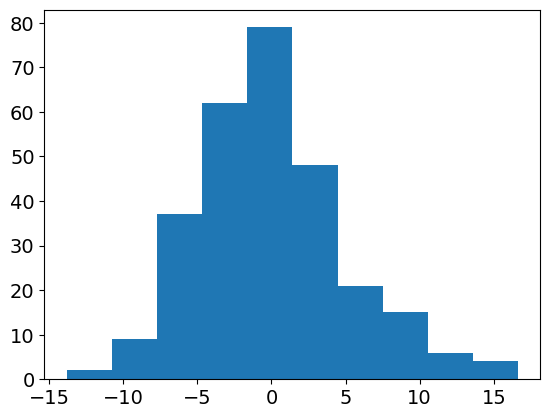

In [29]:
plt.hist(mv_residuals)

**(2g).** [1 pt] Produce a QQ-plot vs Normal distribution of the <b>mv_residuals</b>.

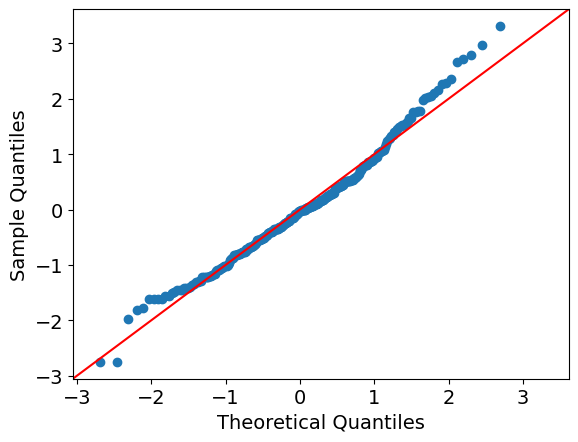

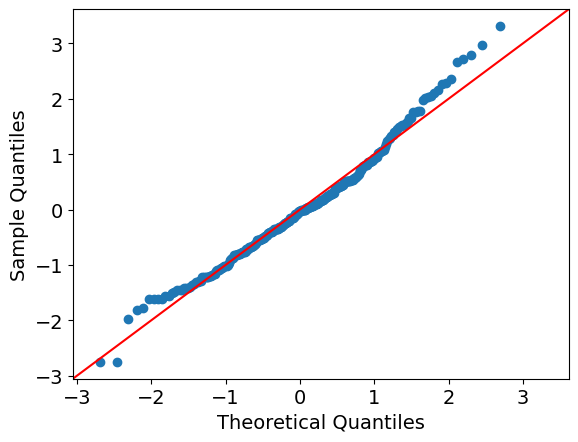

In [30]:
sm.qqplot(mv_residuals, stats.norm, fit=True,line='45')

**(2h).** [1 pt] Do the histogram and QQ-plot suggest that the residuals are Normally distributed?

**A:** Yes

**(2i).** [4 pts] With the <b>train_test_split()</b> function you created in part (0f), produce 10 random subsets of the data for training and testing. For each random split, pass in a different seed.

Using the random splits, run 10 trials of the single variable and multivariable regression. Train your models on the training set and then produce predictions on the corresponding test set. Record the mean squared error on each of the 10 test sets. Print out the average mean squared error on the test sets for both the single variable and multivariate models. 

In [31]:
splits = []
trials = 10
for i in range(trials):
    splits.append(train_test_split(df, i))
sve = mve = 0
for split in splits:
    #extract training and test sets from random split
    df_train, df_test = split
    expr = 'mpg ~ horsepower'
    #training and test matrices
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    
    #build model and predict
    sv_model = sm.regression.linear_model.OLS(y_train, X_train)
    sv_results = sv_model.fit()
    sv_predict = sv_results.predict(X_test)
    sv_residuals = y_test['mpg']-sv_predict
    sv_error = np.linalg.norm(sv_residuals)**2 / len(y_test)
    sve += sv_error
    
    #repeat with power term
    utils.introduce_power_terms(df_train, 'horsepower',power=2)
    expr = 'mpg ~ horsepower + horsepower^2'
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

    mv_model = sm.regression.linear_model.OLS(y_train, X_train)
    mv_results = mv_model.fit()
    mv_predict =  mv_results.predict(X_test)
    mv_residuals = y_test['mpg']-mv_predict
    mv_error = np.linalg.norm(mv_residuals)**2 / len(y_test)
    mve += mv_error

    
print(f'SV MSE= {sve/trials}') 
print(f'MV MSE= {mve/trials}') 
    

SV MSE= 23.44261629309031
MV MSE= 23.459077594656918


**(2j).** [1 pt] Which of the two models would you prefer, and why? Consider both goodness of fit on the training data and the mean squared error on the test sets.

**A:** I prefer the single variable model as the difference in training error is negligible and the sv model lower error on the test sets given that it has less one parameter which improves its AIC